#  Principal Component Analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.
Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

Now we will explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

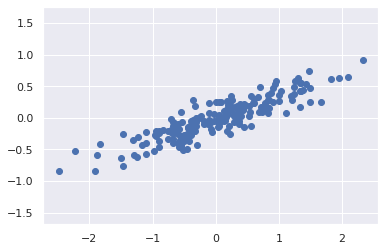

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[ 6.76769235e-01,  5.97386015e-02],
       [-1.07121393e+00,  2.57240064e-01],
       [ 7.27912364e-01, -1.68669939e-01],
       [ 2.30964136e+00,  2.44066575e-01],
       [ 6.30052323e-01, -3.04655713e-01],
       [ 1.02448887e+00,  7.56230140e-02],
       [ 7.77183507e-01, -8.34608477e-02],
       [-1.39656414e+00,  1.44518385e-01],
       [-2.91049874e-01, -2.01289478e-01],
       [ 1.88864221e+00,  2.31419563e-01],
       [-7.11544293e-01,  1.13426118e-01],
       [ 6.38884130e-01,  3.88212853e-02],
       [ 5.48059617e-01, -2.00775267e-01],
       [-2.19312436e-01,  2.08243673e-01],
       [-3.87789490e-01,  6.89135848e-02],
       [ 7.15219956e-01,  1.13841003e-01],
       [-1.08373816e+00,  7.78081042e-02],
       [-2.99917403e-01, -5.86382919e-02],
       [-7.96849021e-01,  2.44527383e-01],
       [-8.12568346e-01, -1.17341246e-01],
       [-1.54018281e+00, -3.24862050e-02],
       [-2.52920476e-01, -4.86012463e-02],
       [ 6.26464454e-01, -1.68045678e-01],
       [-1.

The fit learns the "components" (i.e.-the loadings) and "explained variance":

In [ ]:
print(pca.components_) 

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_) # explained variance for for each principal component vector

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

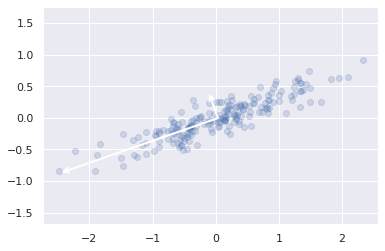

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal component vectors" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![](figures/05.09-PCA-rotation.png)


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


In [ ]:
print(X[0:5,:]) #original data
print(X_pca[0:5,:]) #data transformed to a single pca vector

[[-0.62530162 -0.17006366]
 [ 0.96069503  0.5909006 ]
 [-0.59854339 -0.40259339]
 [-2.22805938 -0.53257674]
 [-0.46143006 -0.49886724]]
[[ 0.67676923]
 [-1.07121393]
 [ 0.72791236]
 [ 2.30964136]
 [ 0.63005232]]


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

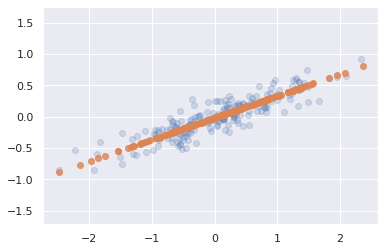

In [ ]:
X_new = pca.inverse_transform(X_pca) # inverse_transform returns pc vector to original matrix
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the hand written digits data.

We start by loading the data:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

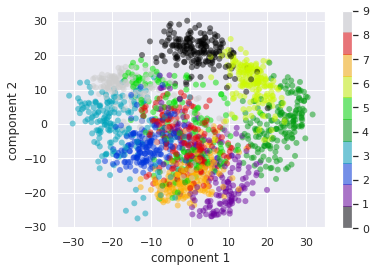

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

![](figures/05.09-digits-pixel-components.png)


The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![](figures/05.09-digits-pca-components.png)


Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

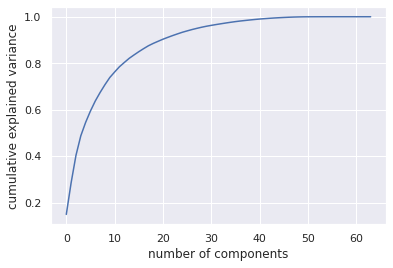

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

In [ ]:
# we also can fit a model that limits the number components given the pct of variance explained

pca = PCA(0.70).fit(digits.data)
print(pca.n_components_) #doing this also provides a way to extract precise components in the chart above.

pca = PCA(0.80).fit(digits.data)
print(pca.n_components_) #80% of variance explained with 13 PCA vectors

pca = PCA(0.95).fit(digits.data)
print(pca.n_components_) #95% of variance explained with 29 PCA vectors

9
13
29


## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

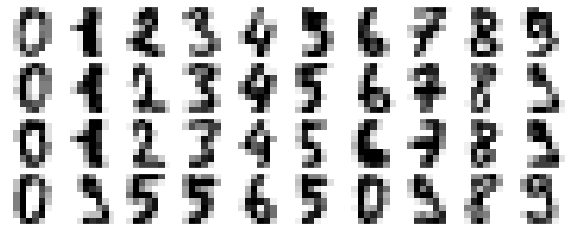

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

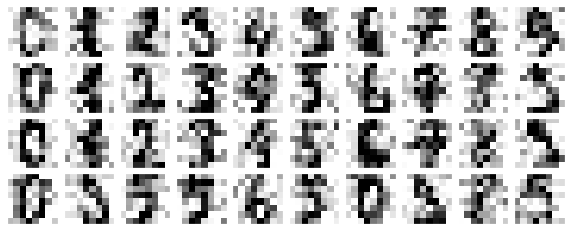

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

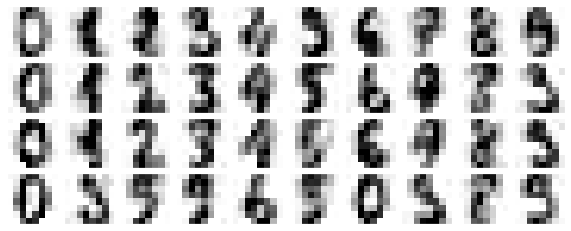

In [ ]:
components = pca.transform(noisy) # extract pca vectors to new matrix

#create new x matrix without noise
filtered = pca.inverse_transform(components) # use inverse_transform to revert to full X matrix drawn 
                                             #  from 50% of pc vectors.  Using all vectors would create original X matrix.
                                             # Using fewer vectors gets rid of vectors that explain the least variance in 
                                             # the original data.
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.

Note that the digits data had 68 features (pixels) that were all in the same scale.  For other datasets you should scale your data to ensure high variance features do not dominate early components.

Credit: J. VanderPlas, Python Data Science Handbook

test push 